# Its a classification problem, in which i have tried to build a model which can predict loan defaulter. i.e. customer who is more likely to default a loan.

In [1]:
# Imporrting all the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split


In [2]:
train=pd.read_csv(r'https://raw.githubusercontent.com/msharma06/my-work/master/Logistic%20Regression/train.csv')
print('Data is fetched')

Data is fetched


In [3]:
print("Total number of columns in Data")
train.columns

Total number of columns in Data


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
print('Data types of all the columns in the data')
train.dtypes

Data types of all the columns in the data


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
print('(Number of rows, No. of Columns)','in data')
train.shape

(Number of rows, No. of Columns) in data


(614, 13)

In [6]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
print("'Y' is no of loans paid,'N' no of loans defaulted")
train['Loan_Status'].value_counts()

'Y' is no of loans paid,'N' no of loans defaulted


Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

#### normalize show the proportion

# univariate analysis

<AxesSubplot:>

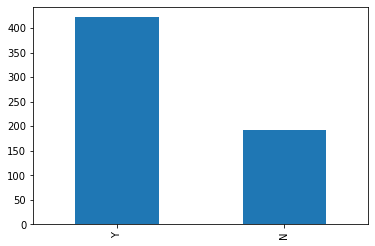

In [9]:
train['Loan_Status'].value_counts().plot.bar()

#### The loan of 422(around 69%) people out of 614 was approved.

<AxesSubplot:title={'center':'SELF EMPLOYED'}>

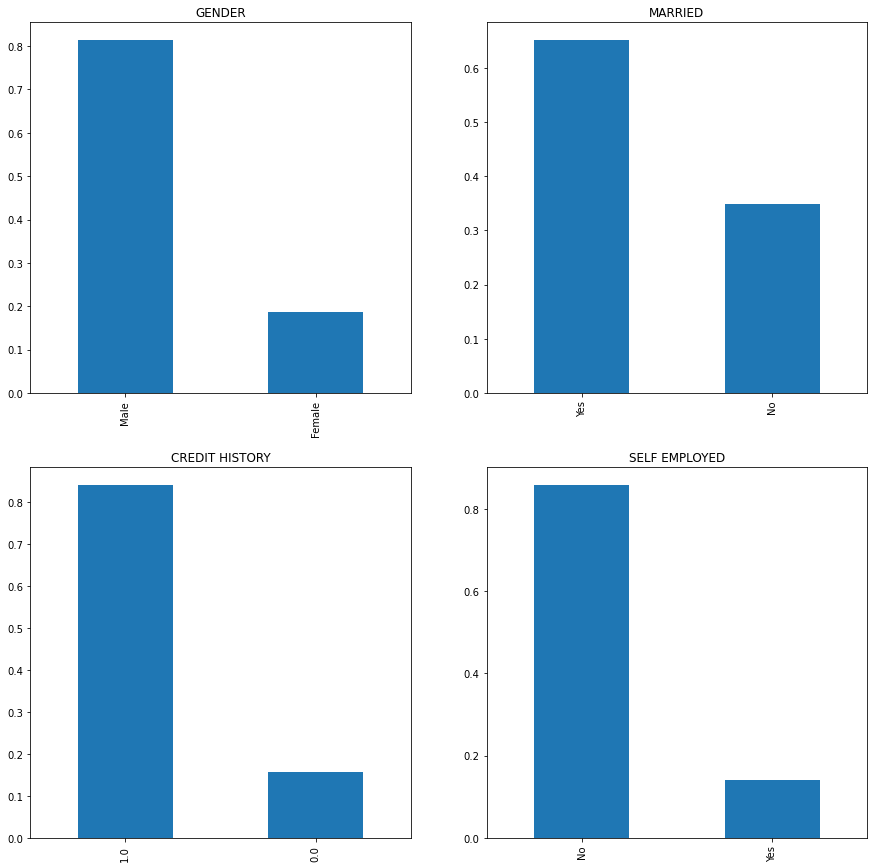

In [10]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(15,15),title='GENDER')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='MARRIED')
plt.subplot(223)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='CREDIT HISTORY')
plt.subplot(224)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title="SELF EMPLOYED")

#### 80% applicants in the dataset are male.
#### 65% of the applicants in the dataset are married.
#### 15% applicants in the dataset are self employed.
#### 85% applicants have repaid their debts.

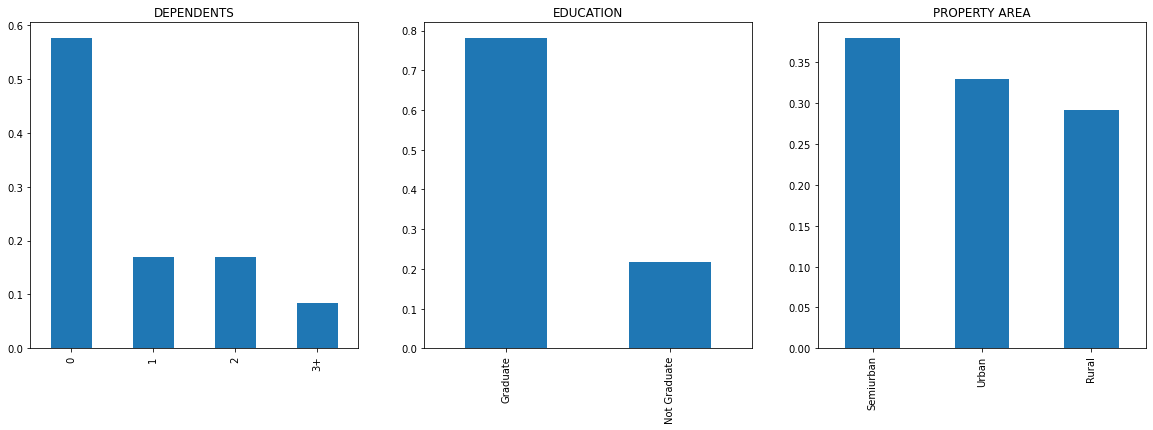

In [11]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(title='DEPENDENTS',figsize=(20,6))
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='EDUCATION')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title="PROPERTY AREA")
plt.show()

#### Most of the applicants don’t have any dependents.
#### Around 80% of the applicants are Graduate.
#### Most of the applicants are from Semiurban area.

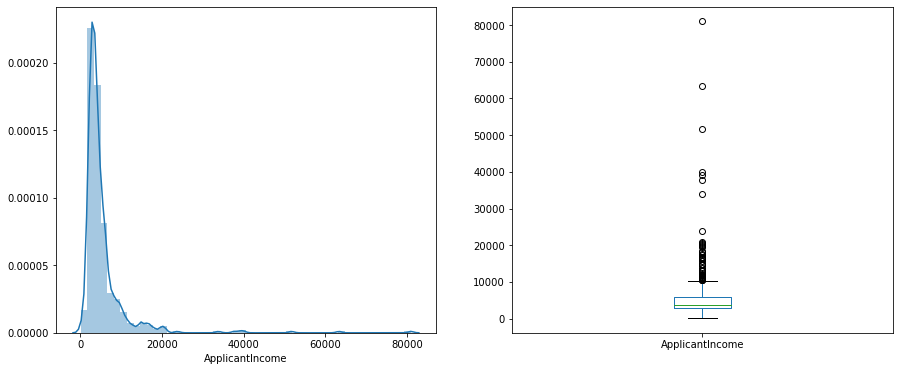

In [12]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(15,6))
plt.show()

<AxesSubplot:xlabel='ApplicantIncome'>

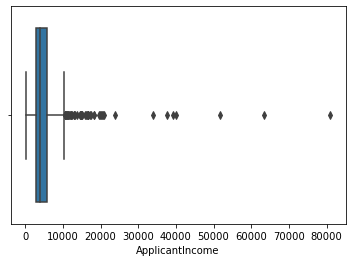

In [13]:
sns.boxplot(x=train['ApplicantIncome'])

#### As we can see that most of the data is toward left which means it is not normally distributed.
#### as we can see lot of outliers are also present in Applicant's Income.

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

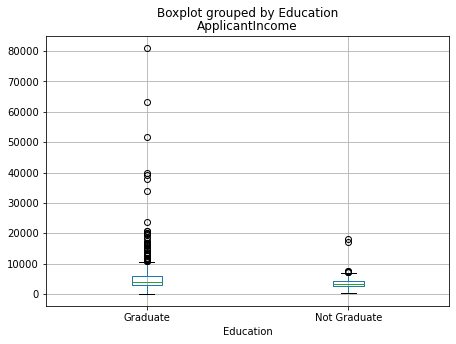

In [14]:
train.boxplot(column='ApplicantIncome',by='Education',figsize=(7,5))

#### We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

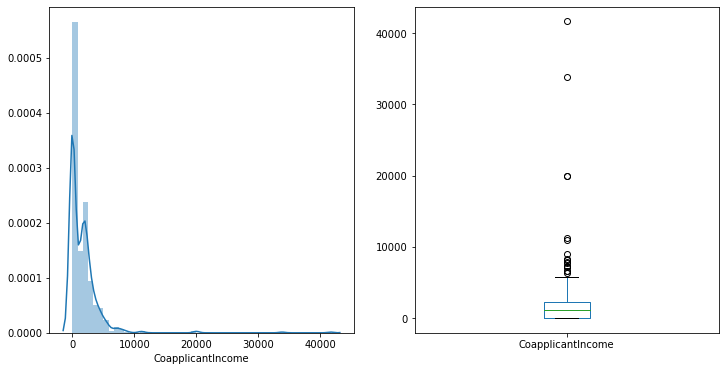

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(12,6))
plt.show()

#### We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

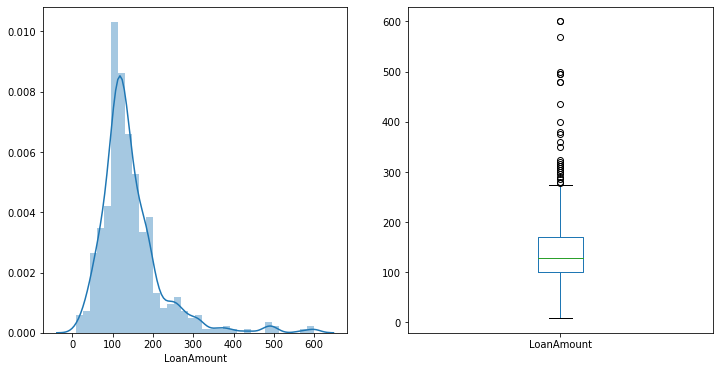

In [16]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount'])
plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(12,6))
plt.show()

#### lot of outliers in this variable and the distribution is fairly normal.

# bivariate analysis

### hypothesis

#### applicants having with high income should have more chance of loan approval.
#### applicant who have repaid their previous debts should have higher chance of loan approval.
#### Loan approval should depend on the loan amount.
#### lesser the amount to be paid monthly to repay the loan, higher the chances of laon approval.

#### above mentioned hypothesis can be tested by bivariate analysis.

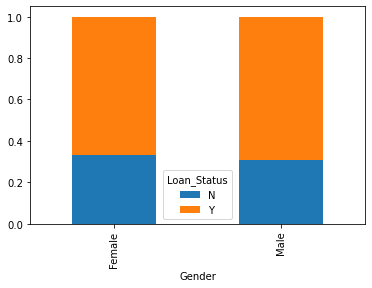

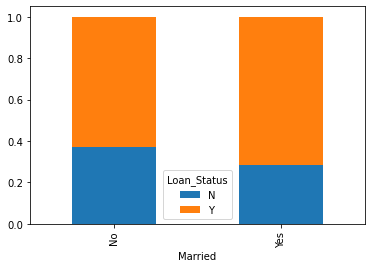

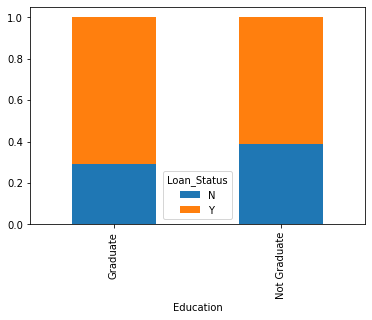

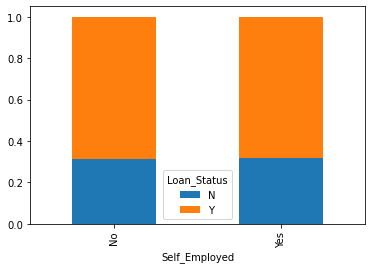

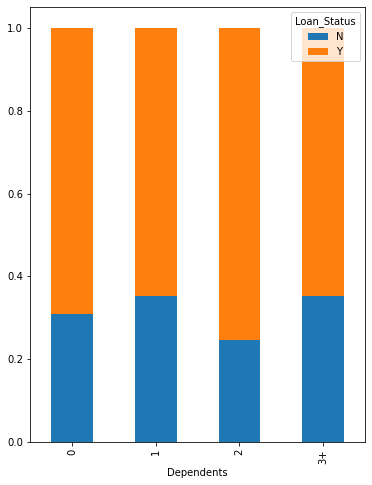

In [17]:
married=pd.crosstab(train['Married'],train['Loan_Status'])
dependent=pd.crosstab(train['Dependents'],train['Loan_Status'])
education=pd.crosstab(train['Education'],train['Loan_Status'])
self_employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
gender=pd.crosstab(train['Gender'],train['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
married.div(married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
self_employed.div(self_employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
dependent.div(dependent.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,8))
plt.show()

##### male and female applicants is almost same for both approved and unapproved loans.
##### proportion of married applicants is higher for the approved loans.
##### distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
##### there is nothing significant we can infer from Self_Employed vs Loan_Status plot.

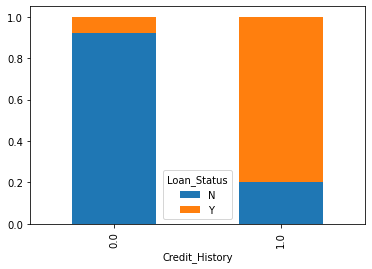

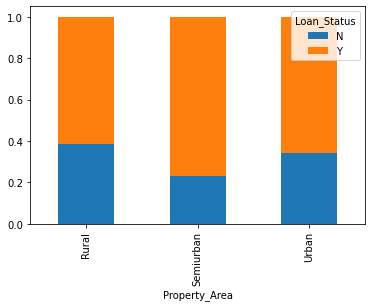

In [18]:
credit_history=pd.crosstab(train['Credit_History'],train['Loan_Status'])
property_area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

credit_history.div(credit_history.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
property_area.div(property_area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

##### It seems people with credit history as 1 are more likely to get their loans approved.
##### Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

## visualization of numerical independent variables with respect to target variable.

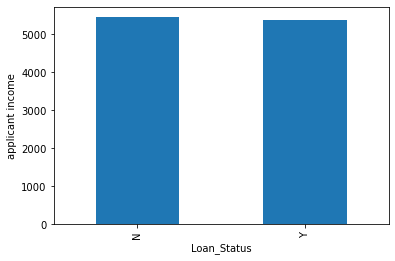

In [19]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.ylabel('applicant income')
plt.show()

#####  not seeing any change in the mean income. have to make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

<AxesSubplot:xlabel='Income_Bin'>

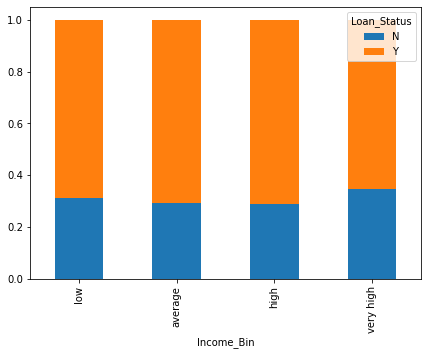

In [20]:
bins=[0,2500,4000,6000,81000]
group=['low','average','high','very high']
train['Income_Bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

income_bin=pd.crosstab(train['Income_Bin'],train['Loan_Status'])
income_bin.div(income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(7,5))


##### As we can see that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

<AxesSubplot:xlabel='Co_Income_Bin'>

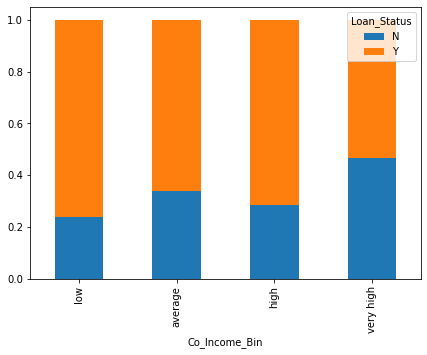

In [21]:
bins=[0,2500,4000,6000,81000]
group=['low','average','high','very high']
train['Co_Income_Bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

coincome_bin=pd.crosstab(train['Co_Income_Bin'],train['Loan_Status'])
coincome_bin.div(coincome_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(7,5))


##### it shows that if coapplicant’s income is less the chances of loan approval are high. but this does not look right. The reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and  the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

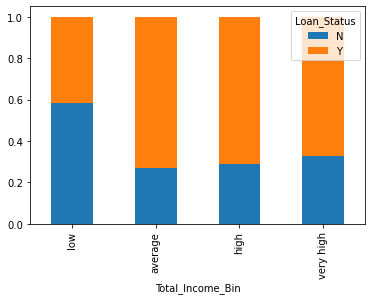

In [22]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
train['Total_Income_Bin']=pd.cut(train['Total_Income'],bins,labels=group)

total_income_bin=pd.crosstab(train['Total_Income_Bin'],train['Loan_Status'])
total_income_bin.div(total_income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

#### We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

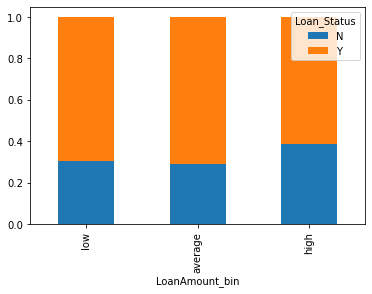

In [23]:
bins=[0,100,200,701]
group=['low','average','high']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

loanamount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
loanamount_bin.div(loanamount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

##### It can be seen that the proportion of approved loans is higher for Low an0 average loan amt as compared to that of high loan amt which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.


In [24]:
train=train.drop(['Income_Bin','Co_Income_Bin','Total_Income_Bin','LoanAmount_bin','Total_Income'],axis=1)

In [25]:
train['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)



#### look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

<AxesSubplot:>

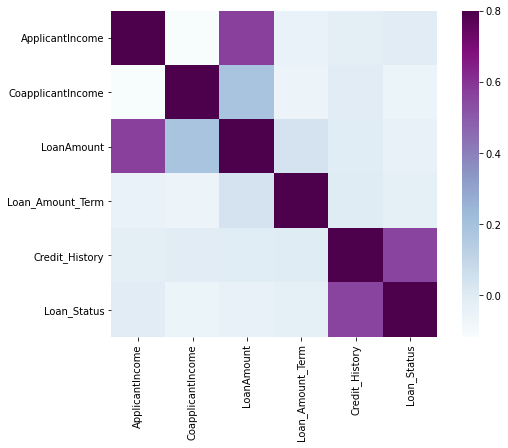

In [26]:
matrix=train.corr() 
f, ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu')

##### We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

### Missing value imputation

In [27]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [29]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

##### the value of 360 is repeating the most. So replaced the missing values in this variable using the mode of this variable.

In [30]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [31]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [32]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##### All the null value are filled in Data set.

##### there is skewness in the loan amount. took log transformation to get distrbution to normal.

<AxesSubplot:>

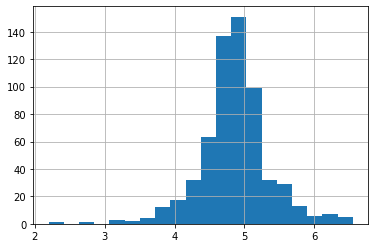

In [33]:
train['LoanAmount_Log']=np.log(train['LoanAmount'])
train['LoanAmount_Log'].hist(bins=20)

##### the distribution looks much closer to normal .

# building a logistic regression model

In [34]:
train=train.drop('Loan_ID',axis=1)

In [35]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

##### creating the dummy variable.

In [36]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)

In [37]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.30)
print("data is splitted so that validation can be done")

data is splitted so that validation can be done


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [39]:
train_pred=model.predict(x_train)
print('training data prediction ')
train_pred

training data prediction 


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [40]:
metrics.confusion_matrix(y_train,train_pred)

array([[ 57,  73],
       [  6, 293]], dtype=int64)

#### confusion matrix for training data

In [41]:
print("Accuracy of trained data")
accuracy_score(y_train,train_pred)

Accuracy of trained data


0.8158508158508159

#### accuracy of trained data

#### lets predict the Loan_Status for validation set and calc its accuracy.

In [42]:
pred_cv=model.predict(x_cv)

In [43]:
metrics.confusion_matrix(y_cv,pred_cv)

array([[ 29,  33],
       [  4, 119]], dtype=int64)

### lets calc how accurate our predictions are by calculating the accuracy

In [44]:
accuracy_score(y_cv,pred_cv)

0.8

### Accuracy for test data.